In [ ]:
 pip install -U scikit-fuzzy

In [2]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

#1.DECLARAMOS LAS VARIABLES DE ENTRADA Y SALIDA

#INPUTS
calidad_comida = ctrl.Antecedent(np.arange(0,101,1), 'calidad_comida')
servicio = ctrl.Antecedent(np.arange(0,101,1), 'servicio')
#OUTPUT
propina = ctrl.Consequent(np.arange(0,101,1), 'propina')





In [3]:
#2. ASIGNAMOS MEMBRESIAS:

#aUTO-MEMBERSHIP FUNCTION POPULATION

calidad_comida['desagradable']= fuzz.trimf(calidad_comida.universe, [0,0,20])
calidad_comida['mediocre']= fuzz.gaussmf(calidad_comida.universe,30,15)
calidad_comida['normal']= fuzz.gaussmf(calidad_comida.universe, 50,5.0)
calidad_comida['rica']= fuzz.trimf(calidad_comida.universe, [50,70,85])
calidad_comida['deliciosa']= fuzz.gbellmf(calidad_comida.universe, 20,70,100)

servicio['nulo']= fuzz.trimf(propina.universe, [0,0,20])
servicio['malo']= fuzz.trimf(propina.universe, [15,20,40])
servicio['normal']= fuzz.trimf(propina.universe, [30,50,60])
servicio['bueno']= fuzz.trimf(propina.universe, [50,70,85])
servicio['excelente']= fuzz.trimf(propina.universe, [75,100,100])

#Manually: trimf = triangular membership function

propina['minimo']= fuzz.trimf(propina.universe, [0,0,20])
propina['poca']= fuzz.trimf(propina.universe, [15,20,40])
propina['media']= fuzz.trimf(propina.universe, [30,50,60])
propina['moderada']= fuzz.trimf(propina.universe, [50,70,85])
propina['alta']= fuzz.trimf(propina.universe, [75,100,100])


/home/kaliw/GITHUB/HANDS_ON_MACHINE_LEARNING/CH2/housing_prices/lib/python3.9/site-packages/skfuzzy/control/term.py:74: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/home/kaliw/GITHUB/HANDS_ON_MACHINE_LEARNING/CH2/housing_prices/lib/python3.9/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/home/kaliw/GITHUB/HANDS_ON_MACHINE_LEARNING/CH2/housing_prices/lib/python3.9/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


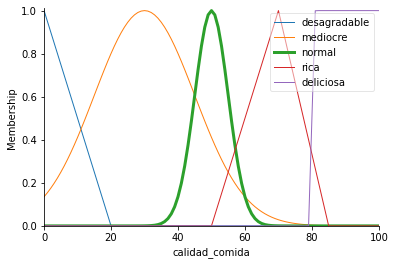

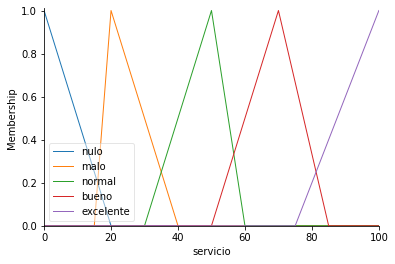

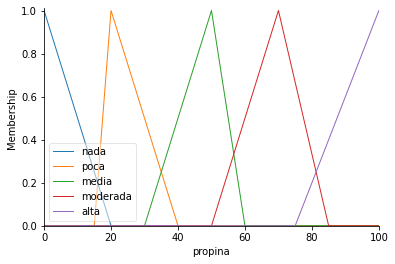

In [4]:
# To view the plots:

calidad_comida['normal'].view() #EL conjunto "AVERAGE" se resaltará
servicio.view()
propina.view()

In [7]:
#3. HACER LOS CONJUNTOS DE REGLAS (IF THEN)

rule1 = ctrl.Rule(calidad_comida['desagradable'] | servicio['nulo'], propina['minimo'])
rule2=ctrl.Rule(calidad_comida['mediocre'] | servicio['malo'] ,propina['poca'])
rule3= ctrl.Rule(calidad_comida['normal'] | servicio['normal'], propina['media'])
rule4=ctrl.Rule(calidad_comida['rica'] | servicio['bueno'], propina['moderada'])
rule5=ctrl.Rule(calidad_comida['deliciosa'] | servicio['excelente'], propina['alta'])

In [8]:
#4. DEFINIR EL CONTROL DEL SISTEMA

tipping_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5])
tipping= ctrl.ControlSystemSimulation(tipping_ctrl)



In [26]:
# 5. DEFINIR LAS ENTRADAS NUMPERICAS PARA CADA VARIABLE DE ENTRADA
tipping.input['calidad_comida']=40
tipping.input['servicio'] = 70
type(40)


int

In [20]:
# HACER LA FUZZYFICACION Y DESFUZZIFICACION DEL SISTEMA
tipping.compute()
# IMPRIMIR LOS RESULTADOS


In [21]:

print(tipping.output['propina'])
#tip.view(tipping)

50.45074027263137
